**Problem Statment:**

Using daily stock data from the S&P500 dating back many years, can we accurately predict the volatility of the market as measured by the VIX (Volatility Index), a measure of expected price fluctuations in the S&P 500 Index options over the next 30 days?

**DATASETS:**

Our predictive features (X Features) were from a kaggle dataset of “Daily Historical Stock Prices (1970-2018)". We found VIX index data from a DataHub dataset of VIX (1993-2018) and used it as our y features (to be predicted).

**DATA CLEANING:**

We performed initial functions on the VIX data, and identified no null values. We dropped all columns except: VIX Closing and Datetime. We left VIX Closing to use as our y feature, and we left the Datetime column to merge on the kaggle dataset.
We then performed initial functions on the stock price data and realized that the dataset included 20,000,000 data points, and 6 features. The data was free of null values. 
We dropped the adjusted close column, because we already had a closing price feature.
20,000,000 data points is far too much for our machines to process, and would lead to highly unbalanced classes for our target dataset. As such, we decided to cherry pick predictive stocks which were representative of different sectors in the stock market.


**FEATURE ENGINEERING:**

We decided to split up our stock data into the 11 main sectors of the stock market:
Energy,
Materials,
Industrials,
Consumer Discretionary,
Consumer Staples, 
Health Care, 
Financials, 
Information Technology, 
Telecommunication Services, 
Utilities, 
Real Estate

The features we use to predict for each sector are the:
open price, close price, high price, low price, and trading volume indexed by day.

For each sector we identified the 3 stocks with the highest trading volumes, and added together each of their feature values into a single value to representing the sector.
For example, for the IT sector we concatenated the data from AAPL, AMD, and MU, into one dataframe indexed by datetime. Then for each feature, we added together each stocks value, and made a new column. So for instance, Opening Price AAPL, Opening Price AMD, and Opening Price MU, we added together into a column Opening Price IT, and then dropped the individual stocks feature column. We did this for all features.

After creating 11 separate dataframes for each sector, with each sector having 5 engineered features, we concatenated all the features into one dataframe, totalling 56 features (55 after converting date column to datetime and indexing according to it), and 3150 data points. 
We then concatenated the VIX dataframe on the date column.


**FITTING MODEL:**

In order to fit our model we first had to convert our features to display percent change from day to day. Next we ran our train test split, scaled our data and then converted our dataset into a time series. After this we proceeded to fit our model with multiple nueral network models

**MODELING:**

Our models consisted of many different types of RNN's, taking advantage of the flexibility of neural networks by changing layer types and their different activation functions and neuron sizes. The problems with these methods are that we can lose out on some interpretability compared to other modeling choices, but we can hopefully discover some more meaningful relationships that might be missed by supervised methods. Since our problem is concerned with predicting the actual value of the VIX at close, we will be using MSE for our loss functions during compilation since this is well suited for the problem. Specifically our metric of interest will be MSE so we can analyze how far off we are from the actual predicted value while putting a heavy penalty on outliers since their difference is squared. 

We first used a simple GRU input layer based model with a single hidden layer activated by ReLU and a dense output layer. This did not yield horrible results when plotting our training and testing loss; however, the results were wildly underwhelming when we took a look at our predicted values vs the actual values. We did see some evidence that the learning rate was good, but the model did appear to be underfitting.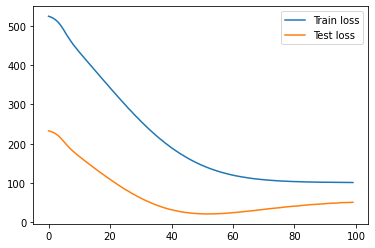

Before we cluttered the model too much, however, we thought it best to see what might happen just by tweaking our output function from ReLU to a simple linear output all while changing from GRU to a generic Dense input layer. Our second model was much more impressive despite being arguably less sophisticated. Indeed we were very close to convergence between our testing and training MSE, yet it still appeared to be quite a bit higher than what we would hope for in an MSE. 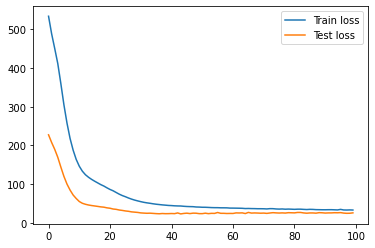

To try to achieve convergence and overcome our underfitting we added an additional dropout layer and made our layers larger. This was all done to create more complexity. We switched to an LSTM input layer of 64 neurons, 2 dense layers of 16 and 8 neurons a piece, and our linear output layer. This achieved convergence after around 25 epochs, but did show signs of overfitting. 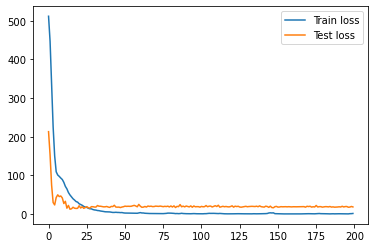

Our final model attempted to speed up the fitting of our previous models while leveraging the strengths of our LSTM successes. To do this we simply increased the neurons in each layer while note changing anything over our previous LSTM model. This model achieved convergence at around 10 epochs and did not show immediate signs of diverging. Considering this to be our best model we went ahead to scoring and found an MSE of around 16.3 for our predicted values. For a testing set mean of nearly 14.5 this indicates solid performance, but certainly not perfect. 
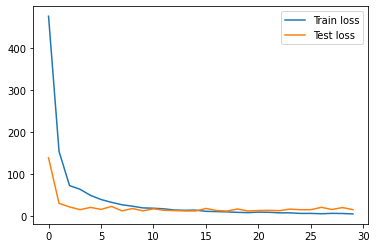 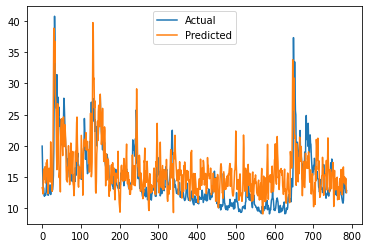

**ANALYSIS AND CONCLUSIONS:**

Faced with the limitations of our hardware and the complexity of models we chose to use to solve our problem, we did adequate, but there are many arenas in which we could likely improve. Beginning with our methodology for stock selection, we could likely improve our model tremendously simply by increasing the amount of stocks we chose to include within each market sector. Even so our methodology for picking stocks is not perfect. We effectively had to decide to choose based on market volume for a static day, but as might be expected, high market volume for a given stock can happen on any given day due to many different factors. This can cause a relatively statistically unimportant stock to appear very statistically significant. Therefore, it could be that some of our stocks are not representative of the market sector, and other stocks within that sector might have served as better proxies. Had we more computational power we might have been able to then work more analysis into these stocks and sort out more clear relationships allowing us to build some sophisticated supervised models. 

Our modeling, however, did prove to be of some success. By our last models MSE we were around 4 dollars of the actual VIX price, or nearly 25% of the average VIX value. But you do see our model overpredicting the volatility. So on average that amount is almost always higher than the VIX. This could very well be due to some of the factors discussed above and could likely be sorted out with more training data. To be more specific about the models themselves, our LSTM models showed the most promise. We suspect this is due to the complexity of the model, and the inherent strengths of LSTM over other RNN models. This is simply because what LSTM does well is memory. Any market is likely to be a reflection of an incrompehensible number of factors that extend beyond the mere buying and selling of property. It is not always linear causality that moves prices, but likely events that impact far beyond what is immediate. As a result, volatility can be affected by events not just a day prior. These are the intuitions for leveraging the strenghts of LSTM. 

Moving forward, we would like to extend the predictive power of our model to many days out, as knowing a few days prior that volatility is coming might not help the investor much due to liquidity issues. Complicating our methodology and expanding our sector scope would be a better bet for increasing our predictive power, but increasing our time series sequences would be potentially helpful for predicting further into the future. Additionally looking outside of the market sectors and integrating some natural language processing for headline news pieces from business journals and staple media organizations might help very much with VIX predictions, as volatility is a complicated and sensitive object in a globalized world.